## Load the data

In [1]:
import datacube

In [2]:
dc = datacube.Datacube()

In [3]:
measurements = ['red', 'green', 'blue']

In [4]:
drone_rgb = dc.load(product='WebODM_MavicMini_RGBA', 
                    measurements=measurements).squeeze()

In [5]:
landsat_rgb = dc.load(product='ls8_l2_c2_colorado_springs', 
                      measurements=measurements,
                      latitude=drone_rgb.latitude[[0,-1]],
                      longitude=drone_rgb.longitude[[0,-1]]).squeeze()

## Determine resolution

In [6]:
drone_to_landsat_res_ratio_latitude = len(drone_rgb.latitude) / len(landsat_rgb.latitude)
drone_to_landsat_res_ratio_longitude = len(drone_rgb.longitude) / len(landsat_rgb.longitude)
drone_to_landsat_res_ratio = drone_to_landsat_res_ratio_longitude * drone_to_landsat_res_ratio_latitude

In [7]:
lat_rng = (drone_rgb.latitude[-1] - drone_rgb.latitude[0]).values
lon_rng = (drone_rgb.longitude[-1] - drone_rgb.longitude[0]).values

In [8]:
print(f'The drone data is {drone_to_landsat_res_ratio_latitude:.0f} '
       'times the resolution of the Landsat data in the y dimension.')

print(f'The drone data is {drone_to_landsat_res_ratio_longitude:.0f} '
       'times the resolution of the Landsat data in the x dimension.')

print(f'So in total, the drone data is {drone_to_landsat_res_ratio:.0f} '
       'times the resolution of the Landsat data.\n')

print(f'Known Landsat data resolution: 30m (latitude and longitude)')
print(f'Approximated loaded Landsat data resolution: {lat_rng * 111000 / len(landsat_rgb.latitude):.3f}m (latitude)')
print(f'Approximated loaded Landsat data resolution: {lon_rng * 111000 / len(landsat_rgb.longitude):.3f}m (longitude)')
print(f'Drone data resolution: {lat_rng * 111000 / len(drone_rgb.latitude) * 100:.3f}cm (latitude)')
print(f'Drone data resolution: {lon_rng * 111000 / len(drone_rgb.longitude) * 100:.3f}cm (longitude)')


The drone data is 1246 times the resolution of the Landsat data in the y dimension.
The drone data is 1024 times the resolution of the Landsat data in the x dimension.
So in total, the drone data is 1275201 times the resolution of the Landsat data.

Known Landsat data resolution: 30m (latitude and longitude)
Approximated loaded Landsat data resolution: 24.860m (latitude)
Approximated loaded Landsat data resolution: 26.201m (longitude)
Drone data resolution: 1.995cm (latitude)
Drone data resolution: 2.560cm (longitude)


## Visualize the data

> Drone data

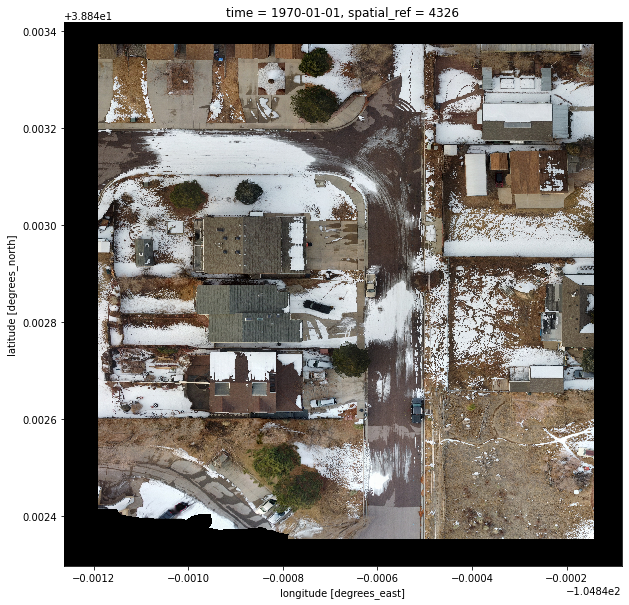

In [9]:
figsize = (10,10)
drone_rgb.to_array().plot.imshow(figsize=figsize)

> Landsat 8 data

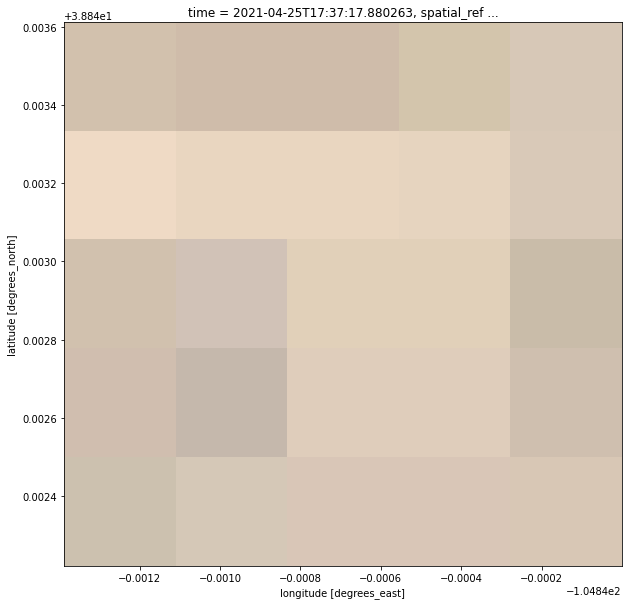

In [10]:
landsat_rgb.to_array().plot.imshow(vmin=0, vmax=15000, figsize=figsize)